#Intro:

Following the groundwork set forth in GateCount_exploratory_fil.ipynb, I'm going to import the datasets processed from that notebook and build upon some of the intuition gained from visuals there to explore other relationships.

In [2]:
# Libraries.
import matplotlib, matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# Setup.
% matplotlib inline

# Paths.
path_data = '../../../data/gatecount_%d/'

In [3]:
gate_1315=pd.read_csv('../../../data/gatecounts_edit_1315.csv')
gate_1315.head()

,Unnamed: 0,locationid,entries,servicedate,servicetime_fraction,weekday,month
0,0,1002,0,2013-01-01 00:00:00,3.00,1,1
1,1,1002,1,2013-01-01 00:00:00,5.00,1,1
2,2,1002,2,2013-01-01 00:00:00,5.25,1,1
3,3,1002,3,2013-01-01 00:00:00,5.50,1,1
4,4,1002,6,2013-01-01 00:00:00,5.75,1,1


In [7]:
gate_1315=gate_1315[['locationid','entries','servicedate','servicetime_fraction','weekday']]
gate_1315.head()

,locationid,entries,servicedate,servicetime_fraction,weekday
0,1002,0,2013-01-01 00:00:00,3.00,1
1,1002,1,2013-01-01 00:00:00,5.00,1
2,1002,2,2013-01-01 00:00:00,5.25,1
3,1002,3,2013-01-01 00:00:00,5.50,1
4,1002,6,2013-01-01 00:00:00,5.75,1


In [15]:
def month_col(date):
    return int(date.split(' ')[0].split('-')[1])

gate_1315['month']=map(month_col,gate_1315['servicedate'].values)
gate_1315.head()

,locationid,entries,servicedate,servicetime_fraction,weekday,month
0,1002,0,2013-01-01 00:00:00,3.00,1,1
1,1002,1,2013-01-01 00:00:00,5.00,1,1
2,1002,2,2013-01-01 00:00:00,5.25,1,1
3,1002,3,2013-01-01 00:00:00,5.50,1,1
4,1002,6,2013-01-01 00:00:00,5.75,1,1


In [98]:
gate_1315.to_csv('../../../data/gatecounts_edit_1315.csv')

In [4]:
mbta_daily=pd.read_csv('../../../data/mbta_daily.csv')
mbta_daily.head()

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1130: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,locationid,service_day,entries,name,line_1,line_2,lat,lon,service_datetime,fog,...,entries_weeks_ago_1,entries_weeks_ago_2,entries_weeks_ago_3,rain_predict,rain_fall_predict,snow_predict,snow_fall_predict,snow_accum,snow_accum_predict,dist_to_center
0,1002,2013-01-01 00:00:00,1892,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-01 03:00:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
1,1002,2013-01-02 00:00:00,5134,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-02 04:45:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
2,1002,2013-01-03 00:00:00,5733,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-03 05:00:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
3,1002,2013-01-04 00:00:00,6125,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-04 05:00:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
4,1002,2013-01-05 00:00:00,3410,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-05 04:15:00,0,...,NaN,NaN,NaN,0,0,1,0,0,0,3.404767


In [9]:
mbta_daily['month']=map(month_col,mbta_daily['service_day'].values)

mbta_daily=mbta_daily[['locationid','service_day','snow','snow_fall']]
mbta_daily.head()

,locationid,service_day,snow,snow_fall
0,1002,2013-01-01 00:00:00,0,0
1,1002,2013-01-02 00:00:00,0,0
2,1002,2013-01-03 00:00:00,0,0
3,1002,2013-01-04 00:00:00,0,0
4,1002,2013-01-05 00:00:00,0,0


In [10]:
snow_daily=mbta_daily.groupby('service_day').agg(np.mean).reset_index()
snow_daily=snow_daily[['service_day','snow','snow_fall']]
snow_daily.head()

,service_day,snow,snow_fall
0,2013-01-01 00:00:00,0,0
1,2013-01-02 00:00:00,0,0
2,2013-01-03 00:00:00,0,0
3,2013-01-04 00:00:00,0,0
4,2013-01-05 00:00:00,0,0


###Comment:

In order to prevent from having one very very large data frame that causes memory issues, I will keep gate_1315 and mbta_daily separate. They will be merged once gate_1315 is subsetted into stations of interest and mbta_daily will be subset into data of interest (ie snowfall).

###Import stations info

Bring in a csv that contains the line and group number for each station id. Idea: see if stations that are in the same group behave similarly in snowy conditions

In [11]:
station_info=pd.read_csv('../../../data/Stations_clean.csv')

In [12]:
group_0_ids=list(station_info[station_info['grouping']==0]['stationid'].values)
group_1_ids=list(station_info[station_info['grouping']==1]['stationid'].values)
group_2_ids=list(station_info[station_info['grouping']==2]['stationid'].values)

station_info.head()


,Unnamed: 0,stationid,name,line_temp,grouping,dist_to_center
0,0,1002,Andrew Square,Red,2,3.404767
1,1,1004,JFK/U Mass,Red,0,4.328881
2,2,1005,North Quincy,Red,1,9.777437
3,3,1006,Wollaston,Red,1,10.976943
4,4,1007,Quincy Center,Red,1,12.909591


In [13]:
'''
Fit a linear function of snowfall on the entries for a given station.

begin/end_time: set window of interest for workday. Set to normal AM rush hour

percent: T/F to show y axis as percent of avg entry w/o snow. Otherwise, raw numbers are used and y-axis will
 suffer if this function is used to plot linear fit on multiple stations whose entries differ by large amounts
 
plot: T/F whether or not to plot

plot_type: both, line, or scatter for what to display
***
returns: parameters of line of best fit
'''

def snow_change(station_id,begin_time=6.5,end_time=9.5,percent=False,plot_type='both',plot=True):
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    #want to subset the dataframe to only include months in which there may be snow
    # don't want the seasonal trends of Summer, Spring, early Fall to skew my values for when there 
    # is no snow
    station_records=station_records[(station_records['month']>=10) |(station_records['month']<=3)]
    station_records=station_records[station_records['weekday']<5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]
    
    # Now merge in the weather data
    station_records=station_records.merge(snow_daily,left_on='servicedate',right_on='service_day')
    #return station_records
    if(percent):
        #get subset of snow records
        no_snow=station_records[station_records['snow']==False]
        mean_ridership=np.mean(no_snow[['servicedate','entries']].groupby('servicedate').agg(np.sum)['entries'])
        #print mean_ridership
        
    station_records=station_records[station_records['snow']==True]   
    
    station_records=station_records[station_records['snow_fall']<=20]
    station_grouping=station_records[['servicetime_fraction','servicedate','entries','snow_fall']].groupby('servicedate')
    
    snowfall_vec=station_grouping.agg(np.median)['snow_fall']
    entries_vec=station_grouping.agg(np.sum)['entries']
    
    if(percent):
        p = np.polyfit(snowfall_vec.values,entries_vec.values*1./mean_ridership,1)
    else:
        p = np.polyfit(snowfall_vec.values,entries_vec.values,1)

    x_vals=np.linspace(0,25,len(snowfall_vec.values))
    if plot:
        if (plot_type=='scatter')| (plot_type=='both'):
            if percent:
                plt.scatter(snowfall_vec.values,entries_vec.values*1./mean_ridership,alpha=0.3,color='r')
            else:
                plt.scatter(snowfall_vec.values,entries_vec.values,alpha=0.3,color='r')
        if (plot_type=='line')| (plot_type=='both'):
            plt.plot(x_vals,p[0]*x_vals+p[1],alpha=0.75,label="station: "+str(station_id)) # A red solid line

        plt.xlabel('Inches of Snow')
        plt.ylabel('Entries')
        plt.title('Snowfall vs Entries for station: '+str(station_id))
    #for day in station_grouping:
        
    return [snowfall_vec.values,p,(entries_vec.values*1./mean_ridership)]



###Comment:

Removed the days with more than 20 inches of snow because they were very few yet significantly affected the linear models fit to the data.

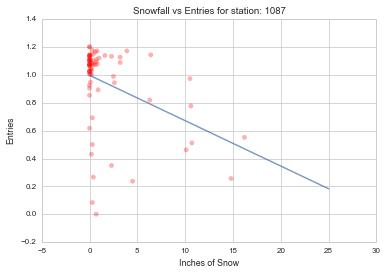

In [101]:
c=snow_change(1087,percent=True,plot_type='both') 
#c.head()


##Effect of Snowfall on Ridership

Exploratory analysis from GateCount_exploratory_fil.ipynb suggests that ridership gradually diminishes with increasing levels of snowfall. The following plots further investigate this claim on various classifications of station.

###Busiest stations

The busiest stations are those listed in the MBTA bluebook as having the highest weekday ridership

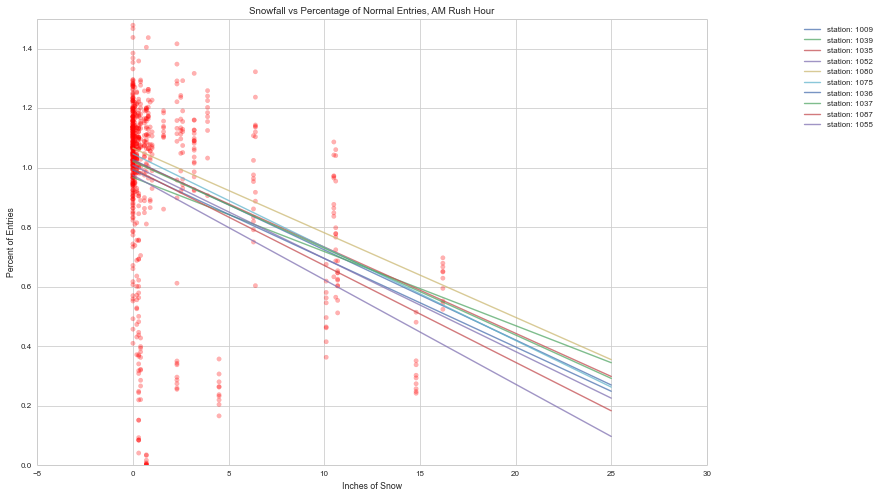

In [70]:
plt.figure(figsize=(12,8))

models=[]
for station in [1009,1039, 1035, 1052,1080,1075,1036, 1037, 1087, 1055]:
    #print station
    t=snow_change(station,percent=True,plot_type='both')
    models.append(t[1])
    plt.xlabel('Inches of Snow')
    plt.ylabel('Percent of Entries')
    plt.ylim([0,1.5])
    #plt.title('Snowfall vs Entriesw/o Snow for station: '+str(station_id))
    
plt.title('Snowfall vs Percentage of Normal Entries, AM Rush Hour')
plt.legend(bbox_to_anchor=(1.1, .9),bbox_transform=plt.gcf().transFigure)
plt.show()

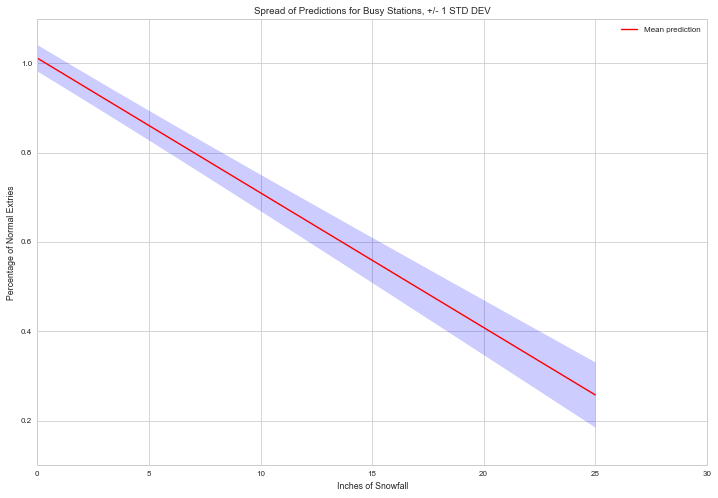

In [71]:
x_values=np.linspace(0,25,100)

pred=np.zeros([len(models),len(x_values)])
plt.figure(figsize=(12,8))

for mod in range(len(models)):
    
    pred[mod]=models[mod][0]*x_values+models[mod][1]
    
# Group the predictions according to their x_value
pred_per_x=pred.transpose()

mean_pred=np.mean(pred_per_x,axis=1)
std_pred=np.std(pred_per_x,axis=1)

upper=(mean_pred + std_pred)
lower=(mean_pred - std_pred)

plt.plot( x_values, mean_pred, color='r', label='Mean prediction')
plt.fill_between(x_values, upper, lower, color='b', alpha=.2,label='1 std dev')
plt.xlabel('Inches of Snowfall')
plt.ylabel('Percentage of Normal Extries')
plt.title('Spread of Predictions for Busy Stations, +/- 1 STD DEV')
plt.legend()
plt.show()



###Average ridership stations

the average stations (Kenmore, Ashmont, Hynes, JFK, Porter, Arlington, Wellington, Airport, North Quincy, Boylston)


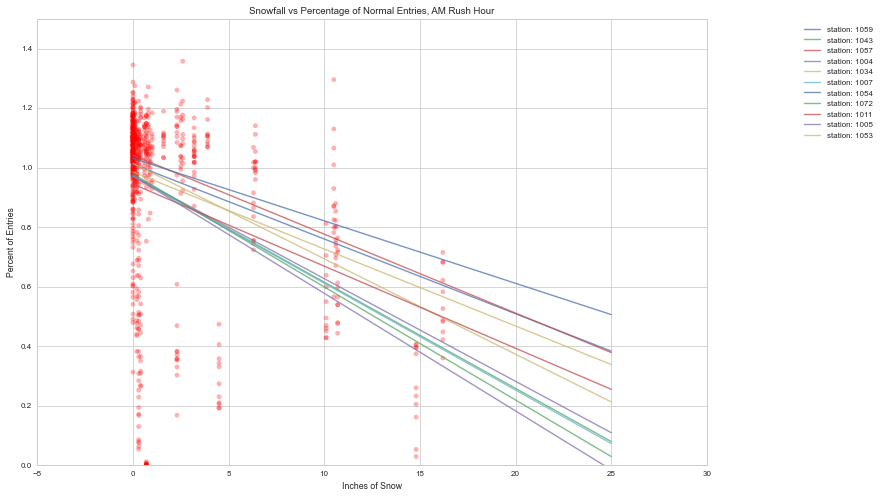

In [72]:
avg_ids=[1059, 1043, 1057, 1004, 1034, 1007,1054, 1072, 1011, 1005, 1053 ]
models=[]

plt.figure(figsize=(12,8))

for station in avg_ids:
    #print station
    t=snow_change(station,percent=True,plot_type='both')
    models.append(t[1])
    plt.xlabel('Inches of Snow')
    plt.ylabel('Percent of Entries')
    plt.ylim([0,1.5])
    #plt.title('Snowfall vs Entriesw/o Snow for station: '+str(station_id))
    
plt.title('Snowfall vs Percentage of Normal Entries, AM Rush Hour')
plt.legend(bbox_to_anchor=(1.1, .9),bbox_transform=plt.gcf().transFigure)
plt.show()


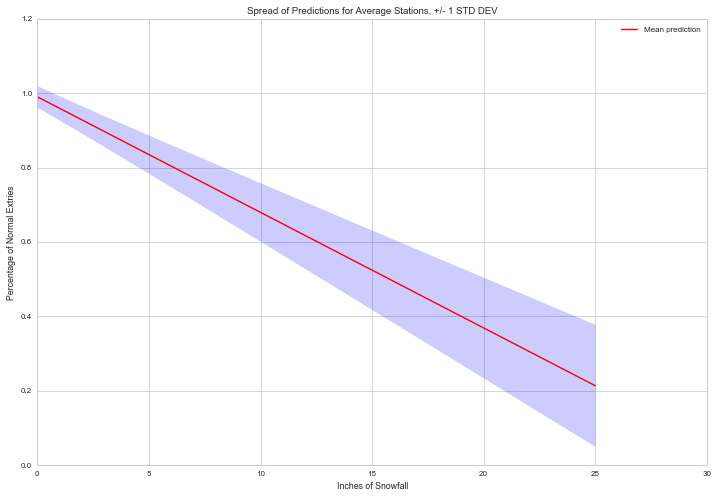

In [73]:
x_values=np.linspace(0,25,100)

pred=np.zeros([len(models),len(x_values)])
plt.figure(figsize=(12,8))

for mod in range(len(models)):
    
    pred[mod]=models[mod][0]*x_values+models[mod][1]
    
# Group the predictions according to their x_value
pred_per_x=pred.transpose()

mean_pred=np.mean(pred_per_x,axis=1)
std_pred=np.std(pred_per_x,axis=1)

upper=(mean_pred + std_pred)
lower=(mean_pred - std_pred)

plt.plot( x_values, mean_pred, color='r', label='Mean prediction')
plt.fill_between(x_values, upper, lower, color='b', alpha=.2,label='1 std dev')
plt.xlabel('Inches of Snowfall')
plt.ylim([0,1.2])
plt.ylabel('Percentage of Normal Extries')
plt.title('Spread of Predictions for Average Stations, +/- 1 STD DEV')
plt.legend()
plt.show()



###Low-ridership stations
the less-utilized stations (Orient Heights, Wood Island, Savin Hill, Shawmut, Riverside, Symphony, WTC, Bowdoin, Courthouse, Suffolk Downs, Science Park)


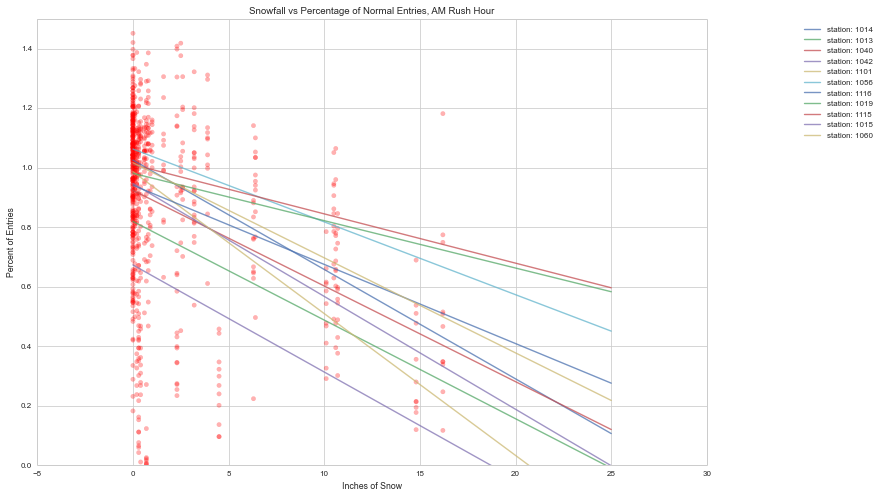

In [74]:

slow_ids=[1014, 1013, 1040, 1042, 1101, 1056, 1116, 1019, 1115, 1015, 1060]
models=[]
plt.figure(figsize=(12,8))

for station in slow_ids:
    #print station
    t=snow_change(station,percent=True,plot_type='both')
    models.append(t[1])
    plt.xlabel('Inches of Snow')
    plt.ylabel('Percent of Entries')
    plt.ylim([0,1.5])
    #plt.title('Snowfall vs Entriesw/o Snow for station: '+str(station_id))
    
plt.title('Snowfall vs Percentage of Normal Entries, AM Rush Hour')
plt.legend(bbox_to_anchor=(1.1, .9),bbox_transform=plt.gcf().transFigure)
plt.show()


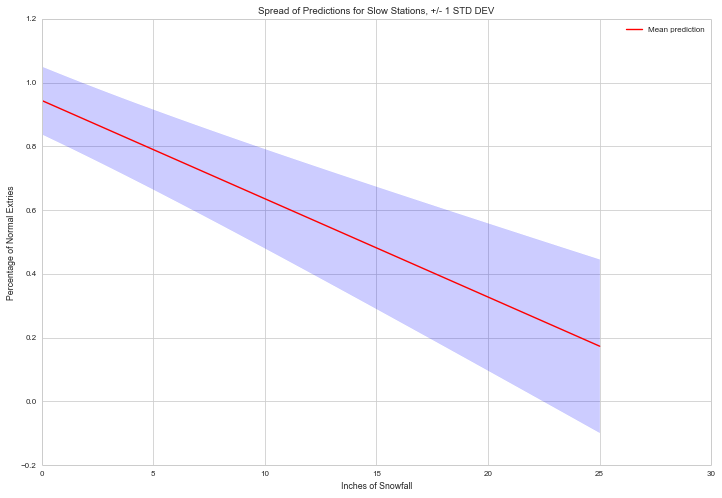

In [75]:
x_values=np.linspace(0,25,100)

pred=np.zeros([len(models),len(x_values)])
plt.figure(figsize=(12,8))

for mod in range(len(models)):
    
    pred[mod]=models[mod][0]*x_values+models[mod][1]
    
# Group the predictions according to their x_value
pred_per_x=pred.transpose()

mean_pred=np.mean(pred_per_x,axis=1)
std_pred=np.std(pred_per_x,axis=1)

upper=(mean_pred + std_pred)
lower=(mean_pred - std_pred)

plt.plot( x_values, mean_pred, color='r', label='Mean prediction')
plt.fill_between(x_values, upper, lower, color='b', alpha=.2,label='1 std dev')
plt.xlabel('Inches of Snowfall')
plt.ylabel('Percentage of Normal Extries')
plt.title('Spread of Predictions for Slow Stations, +/- 1 STD DEV')
plt.legend()
plt.show()



##Snowfall based on clustering stations

###Group 0 stations

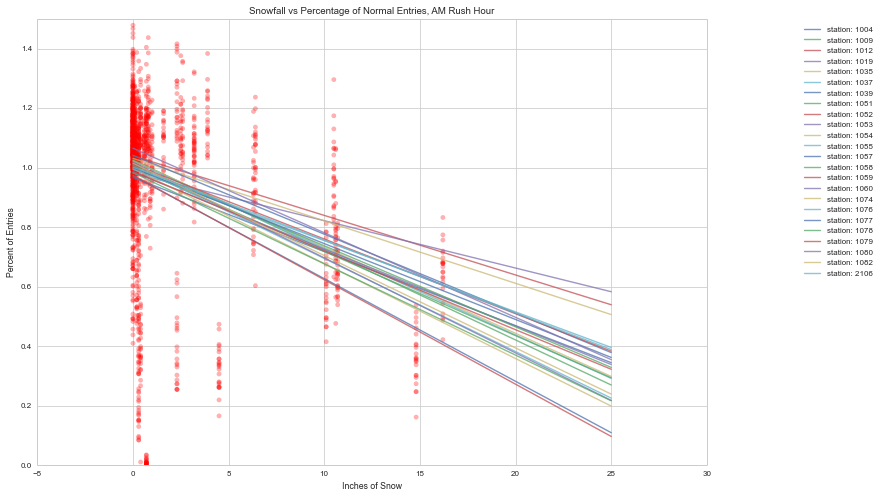

In [72]:

models=[]
snowfall=list([])
ridership=list([])
plt.figure(figsize=(12,8))

for station in group_0_ids:
    #print station
    t=snow_change(station,percent=True,plot_type='both')
    models.append(t[1])
    snowfall.append(t[0])
    ridership.append(t[2])
    plt.xlabel('Inches of Snow')
    plt.ylabel('Percent of Entries')
    plt.ylim([0,1.5])
plt.title('Snowfall vs Percentage of Normal Entries, AM Rush Hour')
plt.legend(bbox_to_anchor=(1.1, .9),bbox_transform=plt.gcf().transFigure)
plt.show()


In [26]:
#create a dict to hold the slopes from each model, separated into my grouping
slopes={0:[],1:[],2:[]}

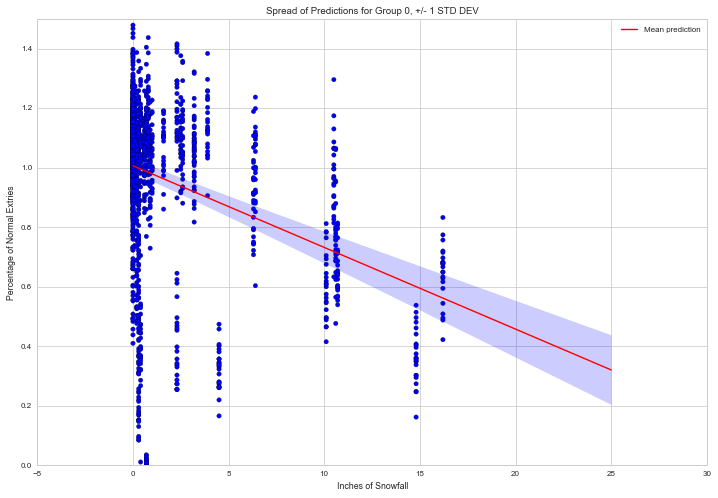

Percentage of ridership for 5.05050505051 inches of snow: 0.867638080995


In [73]:
x_values=np.linspace(0,25,100)

pred=np.zeros([len(models),len(x_values)])
plt.figure(figsize=(12,8))

for mod in range(len(models)):
    
    slopes[0].append(models[mod][0])
    pred[mod]=models[mod][0]*x_values+models[mod][1]
    
# Group the predictions according to their x_value
pred_per_x=pred.transpose()

mean_pred=np.mean(pred_per_x,axis=1)
std_pred=np.std(pred_per_x,axis=1)

upper=(mean_pred + std_pred)
lower=(mean_pred - std_pred)

plt.plot( x_values, mean_pred, color='r', label='Mean prediction')
plt.fill_between(x_values, upper, lower, color='b', alpha=.2,label='1 std dev')

#include plot of points
snowfall_list=[item for sublist in snowfall for item in sublist]
ridership_list=[item for sublist in ridership for item in sublist]
plt.scatter(snowfall_list,ridership_list)

plt.xlabel('Inches of Snowfall')
plt.ylabel('Percentage of Normal Extries')
plt.ylim([0,1.5])
plt.title('Spread of Predictions for Group 0, +/- 1 STD DEV')
plt.legend()
plt.show()

print 'Percentage of ridership for '+str(x_values[20])+' inches of snow: '+str(mean_pred[20])

Percentage of ridership for 5.05050505051 inches of snow: 0.867638080995


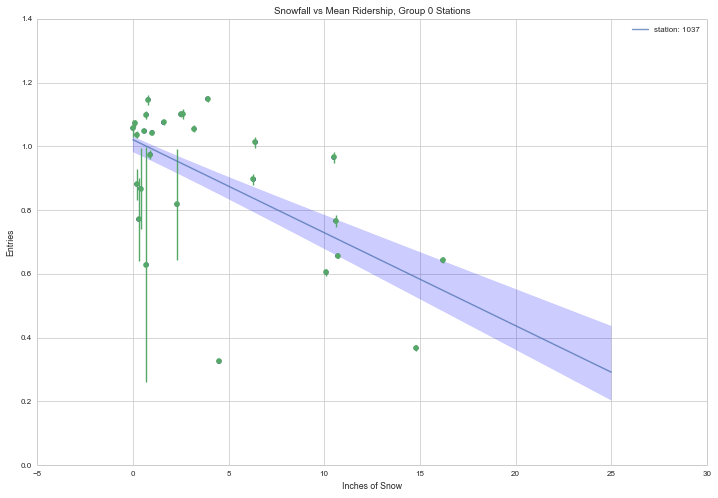

In [75]:

def temp_mean(x):
        return np.mean(x)
def temp_var(x):
    return np.var(x)

snowfall_vector=list([])
ride_vector=list([])
plt.figure(figsize=(12,8))

#using downtown and state st, high correlation
for stat in group_0_ids:
    if(stat==1037):
        plot=True
    else:
        plot=False
    
    c=snow_change(stat,percent=True,plot_type='line',plot=plot)

    snowfall_vector+=list(c[0])
    ride_vector+=list(c[2])

d=pd.DataFrame(zip(snowfall_vector,ride_vector),columns=['snowfall','ridership'])
    
summary=d.groupby('snowfall').agg([temp_mean,temp_var,len])

## Remove snowdays

plt.title('Snowfall vs Mean Ridership, Group 0 Stations')
plt.scatter(summary.index,summary['ridership']['temp_mean'])
plt.errorbar(summary.index,summary['ridership']['temp_mean'],yerr=summary['ridership']['temp_var'],fmt='o')

plt.fill_between(x_values, upper, lower, color='b', alpha=.2,label='1 std dev')
plt.legend()

means=summary['ridership']['temp_mean']
var=summary['ridership']['temp_var']
num=summary['ridership']['len']

print 'Percentage of ridership for '+str(x_values[20])+' inches of snow: '+str(mean_pred[20])

###Group 1 Stations

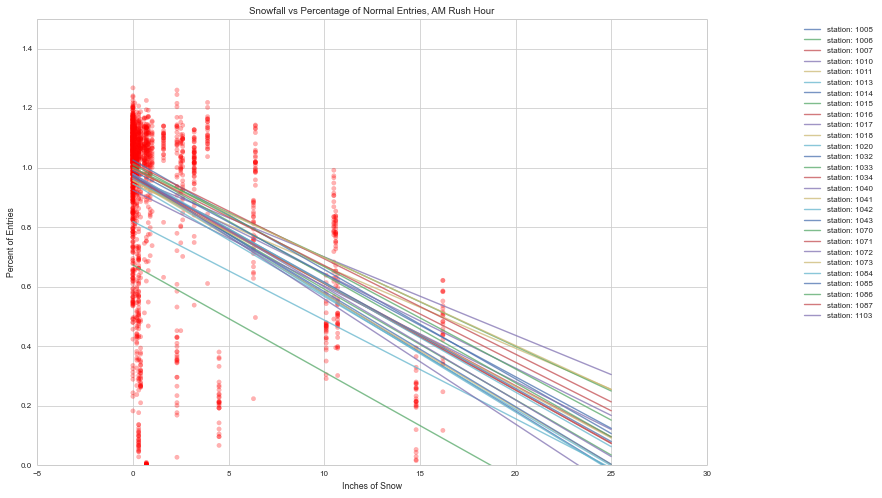

In [77]:
models=[]
snowfall=list([])
ridership=list([])
plt.figure(figsize=(12,8))

for station in group_1_ids:
    #print station
    t=snow_change(station,percent=True,plot_type='both')
    models.append(t[1])
    snowfall.append(t[0])
    ridership.append(t[2])
    plt.xlabel('Inches of Snow')
    plt.ylabel('Percent of Entries')
    plt.ylim([0,1.5])
    
plt.title('Snowfall vs Percentage of Normal Entries, AM Rush Hour')
plt.legend(bbox_to_anchor=(1.1, .9),bbox_transform=plt.gcf().transFigure)
plt.show()


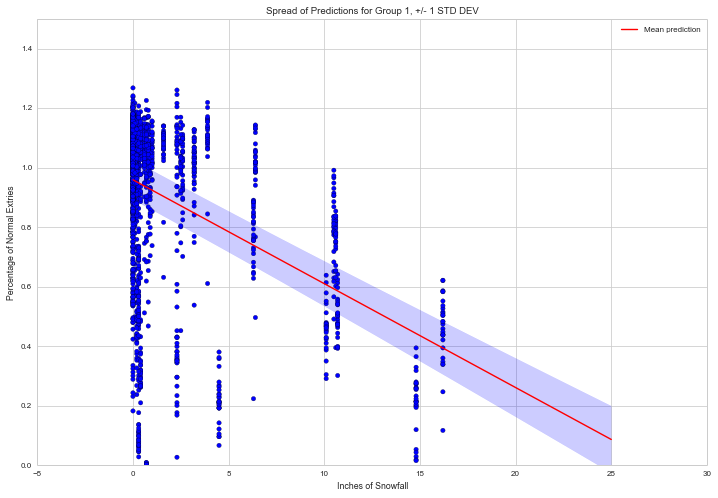

Percentage of ridership for 5.05050505051 inches of snow: 0.782716373395


In [78]:
x_values=np.linspace(0,25,100)

pred=np.zeros([len(models),len(x_values)])
plt.figure(figsize=(12,8))

for mod in range(len(models)):
    slopes[1].append(models[mod][0])
    pred[mod]=models[mod][0]*x_values+models[mod][1]
    
# Group the predictions according to their x_value
pred_per_x=pred.transpose()

mean_pred=np.mean(pred_per_x,axis=1)
std_pred=np.std(pred_per_x,axis=1)

upper=(mean_pred + std_pred)
lower=(mean_pred - std_pred)

plt.plot( x_values, mean_pred, color='r', label='Mean prediction')
plt.fill_between(x_values, upper, lower, color='b', alpha=.2,label='1 std dev')

#include plot of points
snowfall_list=[item for sublist in snowfall for item in sublist]
ridership_list=[item for sublist in ridership for item in sublist]
plt.scatter(snowfall_list,ridership_list)

plt.xlabel('Inches of Snowfall')
plt.ylabel('Percentage of Normal Extries')
plt.ylim([0,1.5])
plt.title('Spread of Predictions for Group 1, +/- 1 STD DEV')
plt.legend()
plt.show()

print 'Percentage of ridership for '+str(x_values[20])+' inches of snow: '+str(mean_pred[20])

Percentage of ridership for 5.05050505051 inches of snow: 0.782716373395


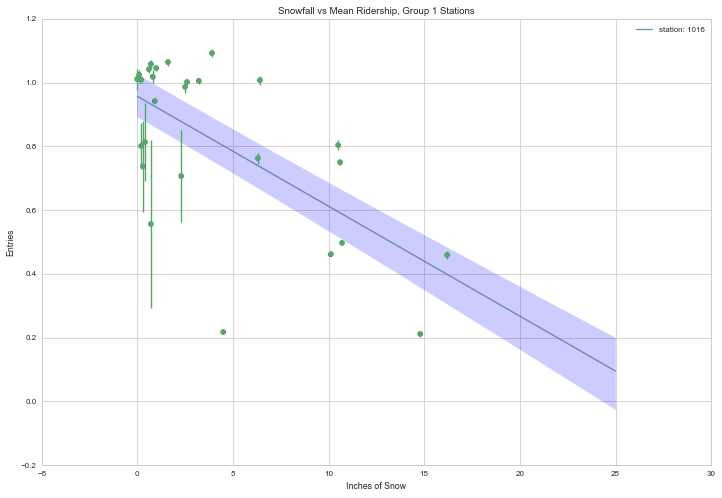

In [90]:

def temp_mean(x):
        return np.mean(x)
def temp_var(x):
    return np.var(x)

snowfall_vector=list([])
ride_vector=list([])
plt.figure(figsize=(12,8))

#using downtown and state st, high correlation
for stat in group_1_ids:
    if(stat==1016):
        plot=True
    else:
        plot=False
    
    c=snow_change(stat,percent=True,plot_type='line',plot=plot)

    snowfall_vector+=list(c[0])
    ride_vector+=list(c[2])

d=pd.DataFrame(zip(snowfall_vector,ride_vector),columns=['snowfall','ridership'])
    
summary=d.groupby('snowfall').agg([temp_mean,temp_var,len])

## Remove snowdays

plt.title('Snowfall vs Mean Ridership, Group 1 Stations')
plt.scatter(summary.index,summary['ridership']['temp_mean'])
plt.errorbar(summary.index,summary['ridership']['temp_mean'],yerr=summary['ridership']['temp_var'],fmt='o')

plt.fill_between(x_values, upper, lower, color='b', alpha=.2,label='1 std dev')
plt.legend()

means=summary['ridership']['temp_mean']
var=summary['ridership']['temp_var']
num=summary['ridership']['len']

print 'Percentage of ridership for '+str(x_values[20])+' inches of snow: '+str(mean_pred[20])

###Group 2 Stations

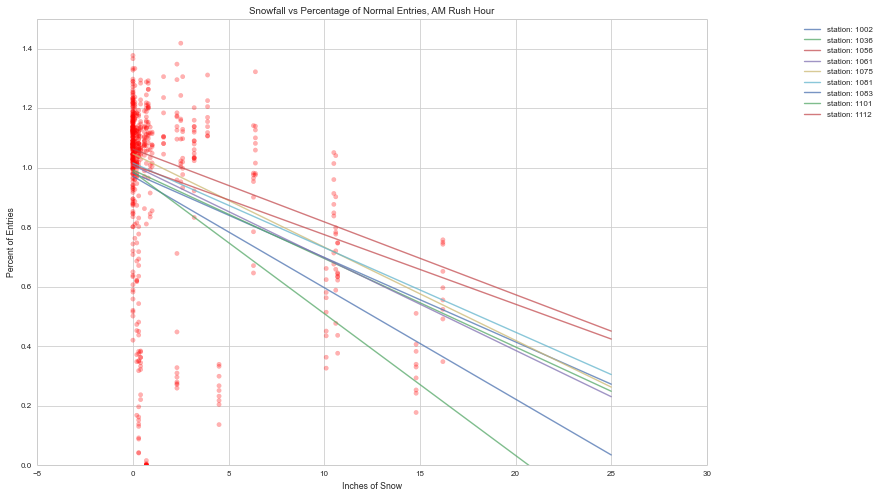

In [91]:
models=[]
snowfall=[]
ridership=[]
plt.figure(figsize=(12,8))

for station in group_2_ids:
    #print station
    t=snow_change(station,percent=True,plot_type='both')
    models.append(t[1])
    snowfall.append(t[0])
    ridership.append(t[2])
    plt.xlabel('Inches of Snow')
    plt.ylabel('Percent of Entries')
    plt.ylim([0,1.5])
    
plt.title('Snowfall vs Percentage of Normal Entries, AM Rush Hour')
plt.legend(bbox_to_anchor=(1.1, .9),bbox_transform=plt.gcf().transFigure)
plt.show()


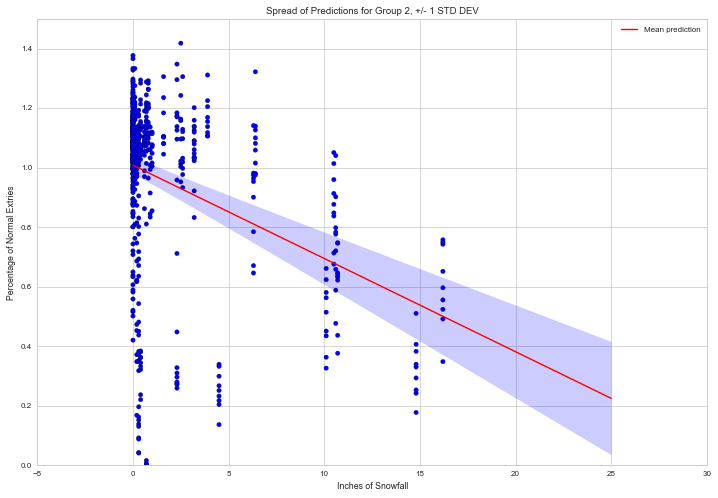

Percentage of ridership for 5.05050505051 inches of snow: 0.849685189409


In [92]:
x_values=np.linspace(0,25,100)

pred=np.zeros([len(models),len(x_values)])
plt.figure(figsize=(12,8))

for mod in range(len(models)):
    
    slopes[2].append(models[mod][0])
    pred[mod]=models[mod][0]*x_values+models[mod][1]
    
# Group the predictions according to their x_value
pred_per_x=pred.transpose()

mean_pred=np.mean(pred_per_x,axis=1)
std_pred=np.std(pred_per_x,axis=1)

upper=(mean_pred + std_pred)
lower=(mean_pred - std_pred)

plt.plot( x_values, mean_pred, color='r', label='Mean prediction')
plt.fill_between(x_values, upper, lower, color='b', alpha=.2,label='1 std dev')

#include plot of points
snowfall_list=[item for sublist in snowfall for item in sublist]
ridership_list=[item for sublist in ridership for item in sublist]
plt.scatter(snowfall_list,ridership_list)

plt.xlabel('Inches of Snowfall')
plt.ylabel('Percentage of Normal Extries')
plt.ylim([0,1.5])
plt.title('Spread of Predictions for Group 2, +/- 1 STD DEV')
plt.legend()
plt.show()

print 'Percentage of ridership for '+str(x_values[20])+' inches of snow: '+str(mean_pred[20])

Percentage of ridership for 5.05050505051 inches of snow: 0.849685189409


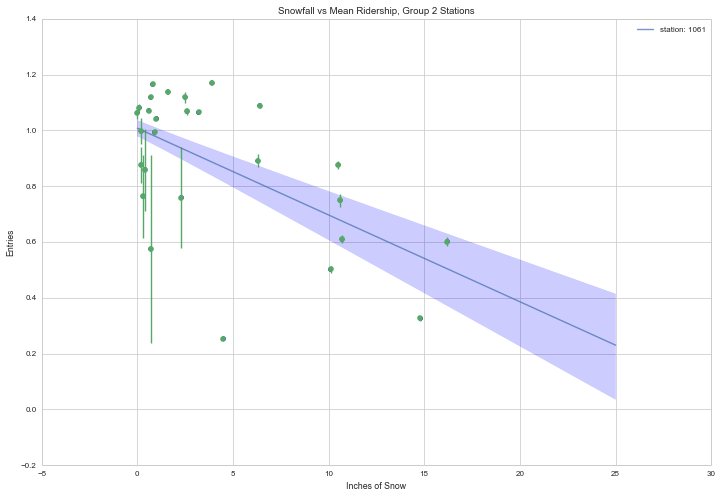

In [95]:

def temp_mean(x):
        return np.mean(x)
def temp_var(x):
    return np.var(x)

snowfall_vector=list([])
ride_vector=list([])
plt.figure(figsize=(12,8))

#using downtown and state st, high correlation
for stat in group_2_ids:
    if(stat==1061):
        plot=True
    else:
        plot=False
    
    c=snow_change(stat,percent=True,plot_type='line',plot=plot)

    snowfall_vector+=list(c[0])
    ride_vector+=list(c[2])

d=pd.DataFrame(zip(snowfall_vector,ride_vector),columns=['snowfall','ridership'])
    
summary=d.groupby('snowfall').agg([temp_mean,temp_var,len])

## Remove snowdays

plt.title('Snowfall vs Mean Ridership, Group 2 Stations')
plt.scatter(summary.index,summary['ridership']['temp_mean'])
plt.errorbar(summary.index,summary['ridership']['temp_mean'],yerr=summary['ridership']['temp_var'],fmt='o')

plt.fill_between(x_values, upper, lower, color='b', alpha=.2,label='1 std dev')
plt.legend()

means=summary['ridership']['temp_mean']
var=summary['ridership']['temp_var']
num=summary['ridership']['len']

print 'Percentage of ridership for '+str(x_values[20])+' inches of snow: '+str(mean_pred[20])

###Investigating Slopes of Models

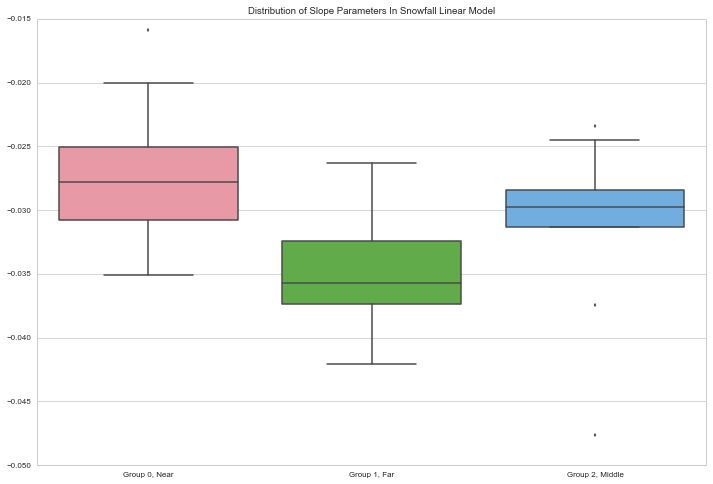

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot([slopes[0],slopes[1],slopes[2]],names=["Group 0, Near",'Group 1, Far','Group 2, Middle'])
plt.title('Distribution of Slope Parameters In Snowfall Linear Model')
plt.show()

###Comments:

As seen in the box plots above, the slope parameters of the linear models fit to snowfall vs change in ridership are significantly lower for the Group 1 stations (those further away from the city). In other words, for the stations further from the city, each unit of snowfall reduces ridership by a greater amount than it does for stations closer to the city.

##Fitting a Higher-Order model

In [182]:
import scipy.optimize as optimization


###Group 0 Stations (Close to City Hall)

False
False


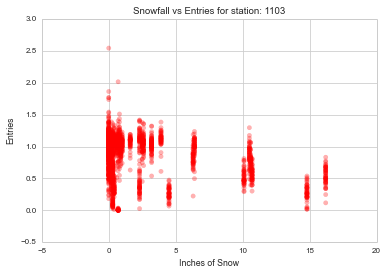

In [141]:
xs1=list([])
ys1=list([])
xs2=list([])
ys2=list([])

for station in group_0_ids:
    temp=snow_change(station,percent=True,plot=True,plot_type='scatter')
    
    #if(len(ys)==0):
    xs1=xs1+list(temp[0])
    ys1=ys1+list(temp[2])
    
for station in group_1_ids:
    temp=snow_change(station,percent=True,plot=True,plot_type='scatter')
    
    #if(len(ys)==0):
    xs2=xs2+list(temp[0])
    ys2=ys2+list(temp[2])
    
print xs1==xs2
print ys1==ys2

24
Parameters: [  1.00461614e+00  -2.75481961e-02   1.00251259e-03  -7.46342116e-05]


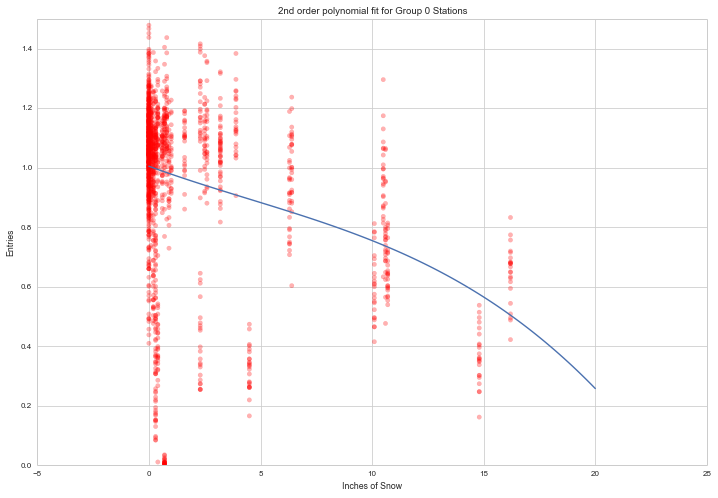

Percentage of ridership for 4.0404040404 inches of snow: 0.904753377512


In [187]:

xs=list([])
ys=list([])
plt.figure(figsize=(12,8))
plt.ylim([0,1.5])

print len(group_0_ids)
for station in group_0_ids:
    temp=snow_change(station,percent=True,plot=True,plot_type='scatter')
    
    #if(len(ys)==0):
    xs=xs+list(temp[0])
    ys=ys+list(temp[2])


def q_func(x,a,b,c,d):
    return a + b*x + c*x*x + d*x**3

x0=np.array([1.2,0,0,0])

fitted_params=optimization.curve_fit(q_func, xs, ys, x0)
print 'Parameters: '+str(fitted_params[0])
#fitted_params[0][0]

x_values=np.linspace(0,20,100)
y_values=q_func(x_values,fitted_params[0][0],fitted_params[0][1],fitted_params[0][2],fitted_params[0][3])

plt.plot(x_values,y_values)
plt.title('3rd order polynomial fit for Group 0 Stations')
plt.show()

print 'Percentage of ridership for '+str(x_values[20])+' inches of snow: '+str(y_values[20])

###Group 1 Stations (Further Away)

28
Parameters: [  9.58705645e-01  -4.03664592e-02   2.20213111e-03  -1.32177022e-04]


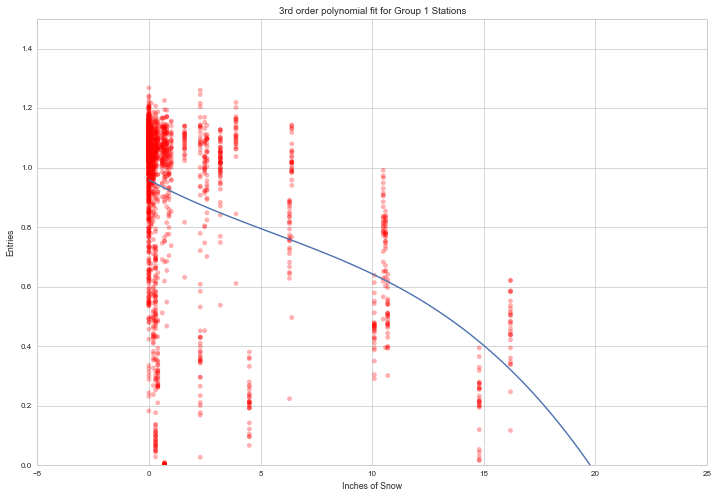

Percentage of ridership for 4.0404040404 inches of snow: 0.822840061429


In [188]:

xs=list([])
ys=list([])
plt.figure(figsize=(12,8))
plt.ylim([0,1.5])
print len(group_1_ids)

for station in group_1_ids:
    temp=snow_change(station,percent=True,plot=True,plot_type='scatter')
    
    #if(len(ys)==0):
    xs=xs+list(temp[0])
    ys=ys+list(temp[2])

def q_func(x,a,b,c,d):
    return a + b*x + c*x*x + d*x**3

x0=np.array([1.2,0,0,0])

fitted_params=optimization.curve_fit(q_func, xs, ys, x0)
print 'Parameters: '+str(fitted_params[0])
#fitted_params[0][0]

x_values=np.linspace(0,20,100)
y_values=q_func(x_values,fitted_params[0][0],fitted_params[0][1],fitted_params[0][2],fitted_params[0][3])

plt.plot(x_values,y_values)
plt.title('3rd order polynomial fit for Group 1 Stations')
plt.show()

print 'Percentage of ridership for '+str(x_values[20])+' inches of snow: '+str(y_values[20])

###Group 2 Stations (Middle Distance)

9
Parameters: [  1.00539401e+00  -2.73629537e-02  -9.12880862e-07  -2.36284449e-05]


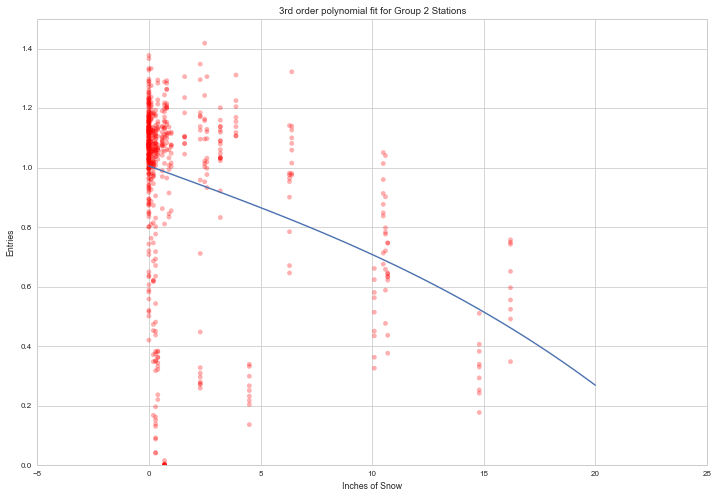

Percentage of ridership for 4.0404040404 inches of snow: 0.893263213194


In [189]:

xs=list([])
ys=list([])
plt.figure(figsize=(12,8))
plt.ylim([0,1.5])
print len(group_2_ids)


for station in group_2_ids:
    temp=snow_change(station,percent=True,plot=True,plot_type='scatter')
    
    #if(len(ys)==0):
    xs=xs+list(temp[0])
    ys=ys+list(temp[2])

def q_func(x,a,b,c,d):
    return a + b*x + c*x*x + d*x**3

x0=np.array([1.2,0,0,0])

fitted_params=optimization.curve_fit(q_func, xs, ys, x0)
print 'Parameters: '+str(fitted_params[0])
#fitted_params[0][0]

x_values=np.linspace(0,20,100)
y_values=q_func(x_values,fitted_params[0][0],fitted_params[0][1],fitted_params[0][2],fitted_params[0][3])

plt.plot(x_values,y_values)
plt.title('3rd order polynomial fit for Group 2 Stations')
plt.show()

print 'Percentage of ridership for '+str(x_values[20])+' inches of snow: '+str(y_values[20])

###Gaussian Stuff

[  3.2   0.4   0.    0.1   1.    0.1   0.6   0.7  10.1   0.    0.    0.2
   0.    0.    0.    2.6  10.5   0.9   6.3   0.3   0.    0.    0.    0.
   0.4   0.3   0.    6.4   0.3   0.   10.6   4.5   0.2   3.9   0.3   0.
   1.6  10.7   0.    0.1   3.2   0.1   2.5   0.    0.4   0.1   0.6   0.
   0.    0.    0.    0.    0.3   2.3   0.    0.3   0.    0.    0.2   0.
   0.2   0.    0.8   0.    2.3   0.2   0.7  16.2   0.    0.8  14.8   0.7]
[ 1.08148191  0.31954601  1.11774649  1.03002798  1.10616461  1.09363339
  1.08926645  1.06344455  0.4148592   1.00990209  1.08641845  1.10825315
  1.00306688  1.10635448  1.02471171  1.19046552  0.86370457  1.07768457
  1.02433197  1.06420402  0.9707895   1.21685702  1.07825417  0.97363751
  1.28862671  1.13350544  1.16426388  1.23679304  0.44656697  0.56979059
  0.95465082  0.26429474  1.06933043  1.25862774  0.62181413  1.18932632
  1.10122807  0.60320717  1.18856685  1.18268097  1.05831815  1.04066053
  1.13369531  1.0740771   1.1549604   1.13521425  1.15

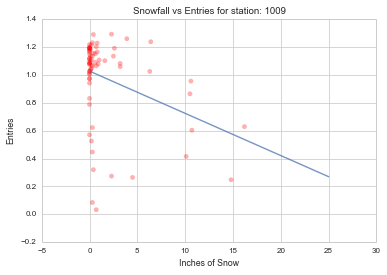

In [14]:
t=snow_change(1009,percent=True,plot_type='both')
print t[0]
print t[2]

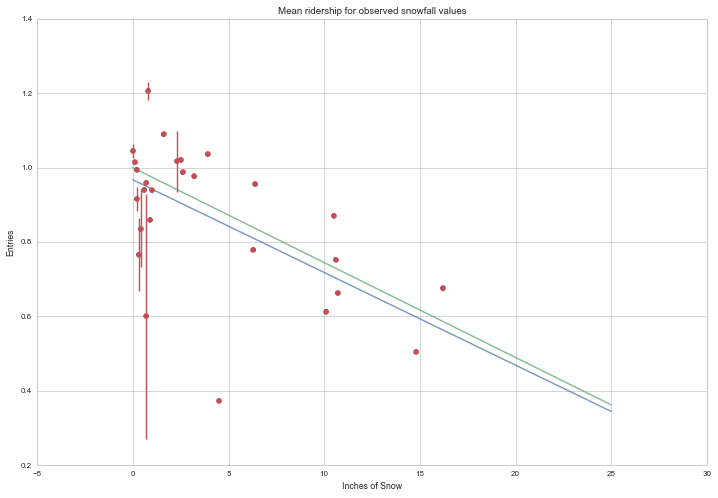

In [122]:

def temp_mean(x):
        return np.mean(x)
def temp_var(x):
    return np.var(x)

snowfall_vector=list([])
ride_vector=list([])
plt.figure(figsize=(12,8))

#using downtown and state st, high correlation
for stat in [1039,1077]:
    c=snow_change(stat,percent=True,plot_type='line')

    snowfall_vector+=list(c[0])
    ride_vector+=list(c[2])

d=pd.DataFrame(zip(snowfall_vector,ride_vector),columns=['snowfall','ridership'])
    
summary=d.groupby('snowfall').agg([temp_mean,temp_var,len])

## Remove snowdays

plt.title('Mean ridership for observed snowfall values')
plt.scatter(summary.index,summary['ridership']['temp_mean'])
plt.errorbar(summary.index,summary['ridership']['temp_mean'],yerr=summary['ridership']['temp_var'],fmt='o')

means=summary['ridership']['temp_mean']
var=summary['ridership']['temp_var']
num=summary['ridership']['len']

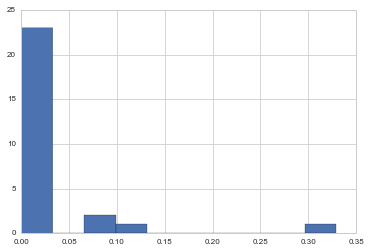

In [88]:
plt.hist(summary['ridership']['temp_var'])
plt.show()

In [125]:
snow_sample=pd.DataFrame(zip(summary.index,means,var,num),columns=['snowfall','mean','var','num_obs'])
snow_sample.to_csv('snow_sample.csv')

##Get time series for one station (day and multiple of same day)

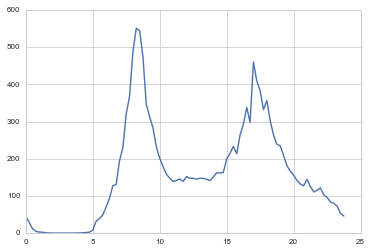

In [99]:
#Central square
t=gate_1315[gate_1315['locationid']==1036]
t=t[t['weekday']==1]
daily=t.groupby('servicetime_fraction').agg(np.mean)['entries']

plt.plot(daily.index,daily)
plt.show()

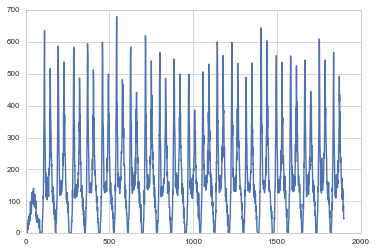

In [117]:
t=gate_1315[gate_1315['locationid']==1036]

#Tuesdays
t=t[t['weekday']==1]
t=t[t['servicedate']<'2013-06-01']
t2=t.groupby(['servicedate','servicetime_fraction']).agg(np.mean)

t2=t2.reset_index()

tuesdays=t2['entries']

plt.plot(t2.index,t2['entries'])
plt.show()

In [11]:
from sklearn.gaussian_process import GaussianProcess


In [28]:
#removing the datapoint with 22 inchese of snow as the model is very sensitive to it
# yet it is very uncharacteristic
snowfall=np.atleast_2d(c[0][:-1]).T
ridership=c[1][:-1]
variance=c[2][:-1]


[[ 1.]]


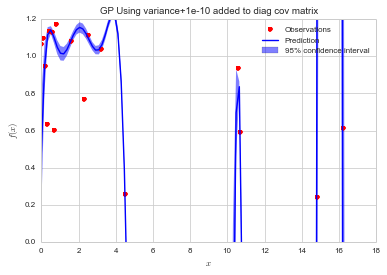

In [45]:

space = np.atleast_2d(np.linspace(0, 17, 100)).T

# Instantiate a Gaussian Process model
'''gp = GaussianProcess(regr='linear', theta0=1, thetaL=1e-5, thetaU=20,
                     random_start=100,nugget=1e-10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(snowfall, ridership)

print gp.theta_

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(space, eval_MSE=True)
sigma = np.sqrt(MSE)

fig = plt.figure(1, figsize=(8,5))
plt.subplot(121)
plt.plot(snowfall, ridership, 'r.', markersize=10, label=u'Observations')
plt.plot(space, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([space, space[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0,1.2)
plt.legend(loc='upper right')
plt.title('GP Using 1e-10 added to diag cov matrix')
'''


##fit with variance of model+little additional to help deal with those points where variance==0
# Instantiate a Gaussian Process model
gp2 = GaussianProcess(regr='linear', theta0=1e-10, thetaL=1e-20, thetaU=1,
                     random_start=200,nugget=variance+1e-10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp2.fit(snowfall, ridership)

print gp2.theta_

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp2.predict(space, eval_MSE=True)
sigma = np.sqrt(MSE)

#plt.subplot(122)
plt.plot(snowfall, ridership, 'r.', markersize=10, label=u'Observations')
plt.plot(space, y_pred, 'b-', label=u'Prediction')
#plt.errorbar(snowfall,ridership,variance,fmt='none')
plt.fill(np.concatenate([space, space[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0,1.2)
plt.legend(loc='upper right')
plt.title('GP Using variance+1e-10 added to diag cov matrix')
plt.show()

In [ ]:
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
gp = GaussianProcess( theta0=1e-2, thetaL=1e-4, thetaU=1e-1,
                     random_start=100)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.plot(X, y, 'r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 20)
pl.legend(loc='upper left')

##Gaussian Processes

In [23]:
from pymc.gp import *
from pymc.gp.cov_funs import matern


(-1.0, 0.99000000000000177, 2.4854009793906218, 3.9624679844736916)

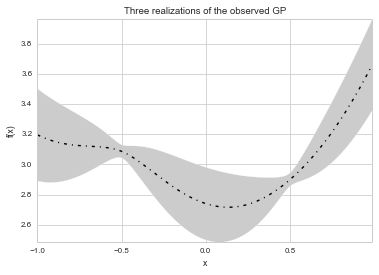

In [29]:
def quadfun(x, a, b, c):
    return (a * x ** 2 + b * x + c)

M = Mean(quadfun, a=1., b=.5, c=2.)
C = Covariance(
    eval_fun=matern.euclidean,
    diff_degree=1.4,
    amp=.4,
    scale=1.)

o = np.array([-.5, .5])
V = np.array([.002, .002])
data = np.array([3.1, 2.9])
observe(M, C, obs_mesh=o, obs_V=V, obs_vals=data)

# Generate realizations
f_list = [Realization(M, C) for i in range(3)]

x = np.arange(-1., 1., .01)

plot_envelope(M, C, mesh=x)

'''for f in f_list:
    plot(x, f(x))'''

xlabel('x')
ylabel('f(x)')
title('Three realizations of the observed GP')
axis('tight')